# A Quick Introduction to pandas

In this tutorial, you will get familiar with the minimal set of features from pandas that will render you operational for this course. If you want to dig deeper into the library, you can follow any of these tutorials:

1. [W3School Pandas Tutorial](https://www.w3schools.com/python/pandas/)
2. [Pandas Kaggle Course](https://www.kaggle.com/learn/pandas)

## 1. Brief Introduction
[pandas](https://pandas.pydata.org/) is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data in a fast, powerful and flexible way. It is built on top of NumPy. The name "pandas" is s short version of "Python for Data Analysis".

### Features
Some of the main features of pandas include:
* Easy handling of missing data (represented as NaN) in floating point as well as non-floating point data
* Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects
* Automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
* Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
* Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets
* Intuitive merging and joining datasets
* Flexible reshaping and pivoting of datasets
* Hierarchical labeling of axes (possible to have multiple labels per tick)
* Robust IO tools for loading data from flat files (CSV and delimited), Excel files, databases, and saving/loading data from the ultrafast HDF5 format
* Time series-specific functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.


## 2. The Basics
As with other libraries, the first step to work with pandas is to import it

In [2]:
import pandas as pd

pandas has two primary structures: Series and DataFrame. 

### DataFrame
A Pandas DataFrame is a 2 dimensional data structure, like a 2 dimensional array, or a table with rows and columns. Each column of a DataFrame can be of a different type such as integers, floats, booleans, datetime or even object, which can hold any Python object. 

We will now cover the basic operations that can be done with a DataFrame

#### Creating a DataFrame
pandas provides multiple ways to create a DataFrame. 

**Examples:**
1. A DataFrame with only numerical values

In [3]:
import numpy as np

data = np.array([[21, 184], [19, 168], [36, 178], [34, 175], [63, 159], [25, 165]]) #Data to be fed into the DataFrame is organized into a numpy array

# df is an abbrevation of DataFrame
df = pd.DataFrame(data=data, columns=["age", "height (cm)"])

# Show DataFrame
df

,age,height (cm)
0,21,184
1,19,168
2,36,178
3,34,175
4,63,159
5,25,165


2. A DataFrame with columns of different types

In [4]:
data = {
  "age": [21, 19, 36],
  "height (cm)": [184, 168, 178], 
  "name": ['John', 'Liz', 'Ben'] 
} #We use a dictionary

#load data into a DataFrame object:
df = pd.DataFrame(data)

df

,age,height (cm),name
0,21,184,John
1,19,168,Liz
2,36,178,Ben


Note that at the left most side of the table, there appears a list of numbers. This is because the DataFrame object creates this list to index the table. Alternatively, one can specify which column should be used as the table index.

In [5]:
df.set_index('name', inplace = True)
df

,age,height (cm)
name,,
John,21,184
Liz,19,168
Ben,36,178


In such case, the column of numbers dissapears and the provided column now acts as the index. 

Notice also, the use of the argument `inplace = True`. Many pandas operations do not modify the object. Instead, they generate a copy of it with the requested modifications. By using `inplace = True`, we make sure that our DataFrame object stored in `df` is directly modified. 

One can also reset the index:

In [6]:
df.reset_index(inplace = True)
df

,name,age,height (cm)
0,John,21,184
1,Liz,19,168
2,Ben,36,178


#### Accessing data
Accessing a single object returns a Series, which is a one-dimensional ndarray with axis labels.

In [7]:
df["age"]

0    21
1    19
2    36
Name: age, dtype: int64

In [8]:
df["name"]

0    John
1     Liz
2     Ben
Name: name, dtype: object

Pandas use the loc attribute to return one or more specified row(s)

In [9]:
#Return row 0
df.loc[0]

name           John
age              21
height (cm)     184
Name: 0, dtype: object

In [10]:
#Return row 0 and 1
#use a list of indexes:
df.loc[[0, 1]]

,name,age,height (cm)
0,John,21,184
1,Liz,19,168


Where there is an index defined, one can directly use the index to access a row:

In [11]:
df.set_index("name", inplace = True) #Let's put the index back

df.loc["John"] #Get me John

age             21
height (cm)    184
Name: John, dtype: int64

In [12]:
df.reset_index(inplace = True)

#### Adding columns

In [13]:
df["sex"] = ["M", "F", "M"]
df["height (m)"] = df["height (cm)"] / 100

df

,name,age,height (cm),sex,height (m)
0,John,21,184,M,1.84
1,Liz,19,168,F,1.68
2,Ben,36,178,M,1.78


#### Removing columns

In [14]:
df = df.drop(columns="height (m)")
df

,name,age,height (cm),sex
0,John,21,184,M
1,Liz,19,168,F
2,Ben,36,178,M


In [15]:
#### Adding Rows
df1= pd.DataFrame([[34, 175, 'F', 'Anna']],
                   columns=['age', 'height (cm)', 'sex', 'name'])
df = pd.concat([df, df1], ignore_index=True)
df

,name,age,height (cm),sex
0,John,21,184,M
1,Liz,19,168,F
2,Ben,36,178,M
3,Anna,34,175,F


#### Boolean indexing
It is possible to select certain rows of a DataFrame by using Boolean expressions:

In [16]:
# In the df DataFrame, show me only the rows in which the "sex" column is "F"
df[df["sex"] == "F"]

,name,age,height (cm),sex
1,Liz,19,168,F
3,Anna,34,175,F


In [17]:
# In the df DataFrame, show me only the rows in which the "sex" column is "M" AND (&) the "age" is below 30
df[(df["sex"] == "M") & (df["age"] < 30)]

,name,age,height (cm),sex
0,John,21,184,M


#### Sorting

In [18]:
# Sort values by age in ascending order
df.sort_values(by="age")

,name,age,height (cm),sex
1,Liz,19,168,F
0,John,21,184,M
3,Anna,34,175,F
2,Ben,36,178,M


In [19]:
# Sort values first by height, then by age in descending order
df.sort_values(by=["height (cm)", "age"], ascending=False)

,name,age,height (cm),sex
0,John,21,184,M
2,Ben,36,178,M
3,Anna,34,175,F
1,Liz,19,168,F


In [20]:
# Sort values first by sex, then by age and last by height in descending order
df.sort_values(by=["sex", "age", "height (cm)"], ascending=False)

,name,age,height (cm),sex
2,Ben,36,178,M
0,John,21,184,M
3,Anna,34,175,F
1,Liz,19,168,F


## 3. I/O Operations
Pandas supports reading from and writing to many data formats, such as CSV, JSON, Pickle, Excel, and more.

Most often the data you will use during the course will be stored in a file, typically a CSV file. CSV files are text files with information separated by commas, saved with the extension .csv. They allow large amounts of detailed data to be transferred 'machine-to-machine', with little or no reformatting by the user.

In this tutorial, **we will focus only on the reading and writing of CSV files**. Please refer to the pandas documentation if you want to know more about how to deal with other types of files.

### Reading 


Now we will load a dataset from [Kaggle](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?select=ds_salaries.csv) with information about data science job salaries.

The dataset contains the following columns:
* work_year - The year the salary was paid.
* experience_level - The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
* employment_type - The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
* job_title - The role worked in during the year.
* salary - The total gross salary amount paid.
* salary_currency - The currency of the salary paid as an ISO 4217 currency code.
* salaryinusd - The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
* employee_residence - Employee's primary country of residence during the work year as an ISO 3166 country code.
* remote_ratio - The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
* company_location - The country of the employer's main office or contracting branch as an ISO 3166 country code.
* company_size  - The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

In [21]:
df = pd.read_csv('data/ds_salaries.csv')

#We can use the function head to see the first 5 elements of the DataFrame. 
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [22]:
# To change the default value of 5, one just needs to specify a new value as argument
df.head(20)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [23]:
#We can also see the last elements of the DataFrame using tail
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


### Exercise 1
Create a new column where the salary is expressed in bitcoins. Denote the column salary_in_btc.

Conversion Rule: 1 USD = 0.000053 BTC

In [24]:
#Your code here
df["salary_in_btc"] = df["salary_in_usd"] * 0.000053

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_btc
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,4.231149
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,13.780000
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,5.778272
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,1.060000
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,7.950000


### Exercise 2
Find all the jobs that earned less than 20000 USD in 2022

In [26]:
#Your code here

df[df["salary_in_usd"] < 20000]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_btc
15,2020,MI,FT,Data Analyst,8000,USD,8000,PK,50,PK,L,0.424000
18,2020,EN,FT,Data Science Consultant,423000,INR,5707,IN,50,IN,M,0.302471
21,2020,MI,FT,Product Data Analyst,450000,INR,6072,IN,100,IN,L,0.321816
38,2020,EN,FT,Data Analyst,10000,USD,10000,NG,100,NG,S,0.530000
45,2020,EN,PT,ML Engineer,14000,EUR,15966,DE,100,DE,S,0.846198
50,2020,EN,FT,Data Analyst,450000,INR,6072,IN,0,IN,S,0.321816
77,2021,MI,PT,3D Computer Vision Researcher,400000,INR,5409,IN,50,IN,M,0.286677
92,2021,MI,FT,Lead Data Analyst,1450000,INR,19609,IN,100,IN,L,1.039277
96,2021,EN,PT,AI Scientist,12000,USD,12000,BR,100,US,S,0.636000
113,2021,EN,PT,AI Scientist,12000,USD,12000,PK,100,US,M,0.636000


### Writing
When writing into disc a CSV file, one needs to be careful specifying if the index should be written as well. This is particularly important when the DataFrame is not using any of its columns as an index (as in the example above).

In [ ]:
df.to_csv("data/ds_salaries_with_bitcoin.csv", index=False) #Notice that index is set to false to avoid that the index used internally by the DataFrame is wirtten to disc.

## 4. Exploratory Data Analysis with pandas
One of the first steps of every machine learning project is to explore the data that you will be working with. It helps us understand how our data looks like, and how it can be processed and manipulated into something meaningful. pandas offers a large set of powerful tools for the task. 

This section summarizes some of these functions.

### Data Preview
Sometimes DataFrames are too big and cannot be fully displayed. As we previously saw, functions like `head()` and `tail()` can provide a quick view of the first and last elements. In addition to these, `sample` can display a random set of elements. In summary:

* `head(n)` returns the first n rows
* `tail(n)` returns the last n rows
* `sample(n)` returns a random sample  of size n of the rows 
* `sample(frac=m)` returns a fraction m of the total number of rows

In [27]:
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_btc
139,2021,EN,FT,Data Scientist,80000,USD,80000,US,100,US,M,4.240000
484,2022,SE,FT,Data Engineer,210000,USD,210000,US,100,US,M,11.130000
595,2022,SE,FT,Data Analytics Manager,109280,USD,109280,US,100,US,M,5.791840
79,2021,EN,FT,Data Analyst,80000,USD,80000,US,100,US,M,4.240000
131,2021,EN,FT,Data Scientist,42000,EUR,49646,FR,50,FR,M,2.631238


In [28]:
df.sample(frac=0.1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_btc
54,2020,SE,FL,Computer Vision Engineer,60000,USD,60000,RU,100,US,S,3.180000
37,2020,EN,FT,Machine Learning Engineer,250000,USD,250000,US,50,US,L,13.250000
246,2021,EN,FT,Data Scientist,31000,EUR,36643,FR,50,FR,L,1.942079
127,2021,MI,FT,Data Scientist,700000,INR,9466,IN,0,IN,S,0.501698
262,2021,MI,FT,Data Scientist,1250000,INR,16904,IN,100,IN,S,0.895912
...,...,...,...,...,...,...,...,...,...,...,...,...
388,2022,SE,FT,Data Engineer,155000,USD,155000,US,100,US,M,8.215000
147,2021,MI,FT,Data Engineer,90000,USD,90000,US,100,US,L,4.770000
504,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M,6.095000
236,2021,MI,FT,Research Scientist,80000,CAD,63810,CA,100,CA,M,3.381930


### DataFrame information and Statistics
* `shape` as in NumPy provides information about the number of rows and columns of the DataFrame
* `info()` prints a concise summary of the DataFrame. It gives, for each column, its type and the number of columns that are non-null (not NaN). It also provides the memory usage of the DataFrame.
* `describe()` generates descriptive statistics, such as the mean, standard deviation, mean, max and quartiles for numerical columns (default). By using the argument `include="all"` it also provides statistics for non-numerical columns (e.g top value, frequency or count).

In [29]:
print(f'DataFrame shape: {df.shape}\n')
print(f'General info:')

df.info()

DataFrame shape: (607, 12)

General info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           607 non-null    int64  
 1   experience_level    607 non-null    object 
 2   employment_type     607 non-null    object 
 3   job_title           607 non-null    object 
 4   salary              607 non-null    int64  
 5   salary_currency     607 non-null    object 
 6   salary_in_usd       607 non-null    int64  
 7   employee_residence  607 non-null    object 
 8   remote_ratio        607 non-null    int64  
 9   company_location    607 non-null    object 
 10  company_size        607 non-null    object 
 11  salary_in_btc       607 non-null    float64
dtypes: float64(1), int64(4), object(7)
memory usage: 57.0+ KB


In [30]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio,salary_in_btc
count,607.000000,6.070000e+02,607.000000,607.00000,607.000000
mean,2021.405272,3.240001e+05,112297.869852,70.92257,5.951787
std,0.692133,1.544357e+06,70957.259411,40.70913,3.760735
min,2020.000000,4.000000e+03,2859.000000,0.00000,0.151527
25%,2021.000000,7.000000e+04,62726.000000,50.00000,3.324478
50%,2022.000000,1.150000e+05,101570.000000,100.00000,5.383210
75%,2022.000000,1.650000e+05,150000.000000,100.00000,7.950000
max,2022.000000,3.040000e+07,600000.000000,100.00000,31.800000


In [31]:
df.describe(include="all")

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_btc
count,607.000000,607,607,607,6.070000e+02,607,607.000000,607,607.00000,607,607,607.000000
unique,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3,NaN
top,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M,NaN
freq,NaN,280,588,143,NaN,398,NaN,332,NaN,355,326,NaN
mean,2021.405272,NaN,NaN,NaN,3.240001e+05,NaN,112297.869852,NaN,70.92257,NaN,NaN,5.951787
std,0.692133,NaN,NaN,NaN,1.544357e+06,NaN,70957.259411,NaN,40.70913,NaN,NaN,3.760735
min,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.00000,NaN,NaN,0.151527
25%,2021.000000,NaN,NaN,NaN,7.000000e+04,NaN,62726.000000,NaN,50.00000,NaN,NaN,3.324478
50%,2022.000000,NaN,NaN,NaN,1.150000e+05,NaN,101570.000000,NaN,100.00000,NaN,NaN,5.383210
75%,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.00000,NaN,NaN,7.950000


### Plotting
Plotting is a very powerful tool to perform data inspection. pandas offer plotting functionality with the .plot functions, which wrap-around matplotlib.pyplot's plot().

In this tutorial, two minimal examples will be presented for illustration purposes. More info about plotting with pandas can be found at: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


<AxesSubplot: xlabel='experience_level', ylabel='salary_in_usd'>

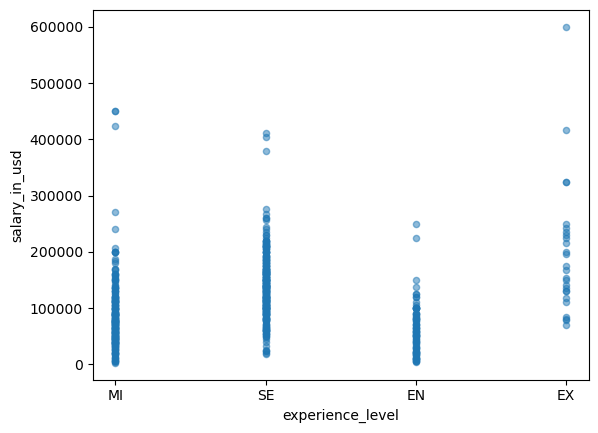

In [32]:
#plots the salary (in USD) as a function of the experience level
df.plot.scatter(x="experience_level", y="salary_in_usd", alpha=0.5)

<AxesSubplot: >

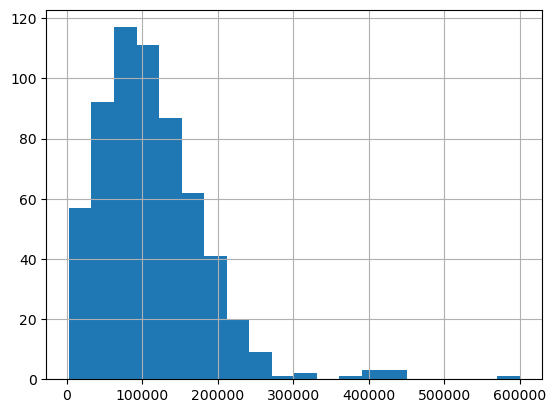

In [33]:
#Histogram of the salary (USD) using 20 bins
df["salary_in_usd"].hist(bins=20)

## 5. Other Resources

* [Pandas Cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
* [Pandas User Guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html)
* [API Reference](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)
* [W3School Pandas Tutorial](https://www.w3schools.com/python/pandas/)
* [Pandas Kaggle Course](https://www.kaggle.com/learn/pandas)